# Exploratory Data Analysis

In [3]:
import pandas as pd

# Load the training data
df_train = pd.read_csv('data/training_data.csv', encoding='ascii')

# Display the first few rows of the dataframe
df_train.head()

,Unnamed: 0,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
0,746,Female,63,26.051019,96.865801,74.879872,Regularly,0.0,0.0,Poor,PA,5.560992,208.921743,1
1,131,Male,51,28.999501,115.878612,113.660525,Regularly,1.0,0.0,Average,PA,12.098365,246.817639,1
2,1711,Female,76,21.135693,144.846268,132.404670,Rarely,0.0,0.0,Poor,FL,6.751833,232.486516,1
3,1534,Male,77,21.610457,NaN,128.789122,Rarely,0.0,0.0,NaN,MI,11.893455,273.670761,1
4,390,Female,68,22.311965,163.945914,84.559669,Frequently,1.0,0.0,Average,NY,6.983366,208.985119,1


In [4]:
df_train.shape

(2000, 14)

In [5]:
df_train.sample(5)

,Unnamed: 0,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
1368,2104,Female,25,22.297060,129.729830,73.012715,Frequently,0.0,0.0,Good,CA,9.104540,127.065055,0
1326,684,Male,54,27.017623,124.042152,56.824439,Regularly,0.0,0.0,Poor,TX,10.722715,NaN,1
827,2201,Female,61,25.452540,128.233886,98.406935,Never,NaN,NaN,Poor,OH,6.036673,283.363788,1
1433,1613,Female,33,35.826682,183.309225,62.519807,Frequently,NaN,0.0,Good,OH,5.364748,143.557324,1
139,372,Male,25,23.189621,95.810695,81.672617,Regularly,NaN,1.0,Poor,CA,12.387456,NaN,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2000 non-null   int64  
 1   gender              2000 non-null   object 
 2   age                 2000 non-null   int64  
 3   bmi                 1808 non-null   float64
 4   systolic_bp         1799 non-null   float64
 5   diastolic_bp        1786 non-null   float64
 6   exercise_frequency  1797 non-null   object 
 7   smoker              1793 non-null   float64
 8   family_history      1808 non-null   float64
 9   diet_quality        1809 non-null   object 
 10  us_state            2000 non-null   object 
 11  shoe_size           2000 non-null   float64
 12  cholesterol_level   1798 non-null   float64
 13  has_disease         2000 non-null   int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 218.9+ KB


In [7]:
df_train.describe()

,Unnamed: 0,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,shoe_size,cholesterol_level,has_disease
count,2000.000000,2000.00000,1808.000000,1799.000000,1786.000000,1793.000000,1808.000000,2000.000000,1798.000000,2000.000000
mean,1125.422500,48.85950,26.344389,135.171377,89.927616,0.491355,0.497235,9.087420,200.182596,0.500000
std,648.171227,18.16942,6.129855,32.525098,21.605908,0.500065,0.500131,2.482624,63.609497,0.500125
min,0.000000,18.00000,-30.416670,-160.014136,-88.834527,0.000000,0.000000,5.001726,-326.500224,0.000000
25%,572.750000,34.00000,21.890592,110.033893,73.460413,0.000000,0.000000,6.662188,159.162338,0.000000
50%,1124.000000,49.00000,26.130707,134.482817,88.391699,0.000000,0.000000,9.176034,198.513944,0.500000
75%,1683.250000,64.25000,30.555388,158.019690,104.559413,1.000000,1.000000,11.572424,237.127907,1.000000
max,2248.000000,80.00000,57.274114,314.622726,223.034901,1.000000,1.000000,13.000000,730.549039,1.000000


In [8]:
df_train.isnull().sum()

Unnamed: 0              0
gender                  0
age                     0
bmi                   192
systolic_bp           201
diastolic_bp          214
exercise_frequency    203
smoker                207
family_history        192
diet_quality          191
us_state                0
shoe_size               0
cholesterol_level     202
has_disease             0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

# Preprocessing for training data 

# Handle outliers

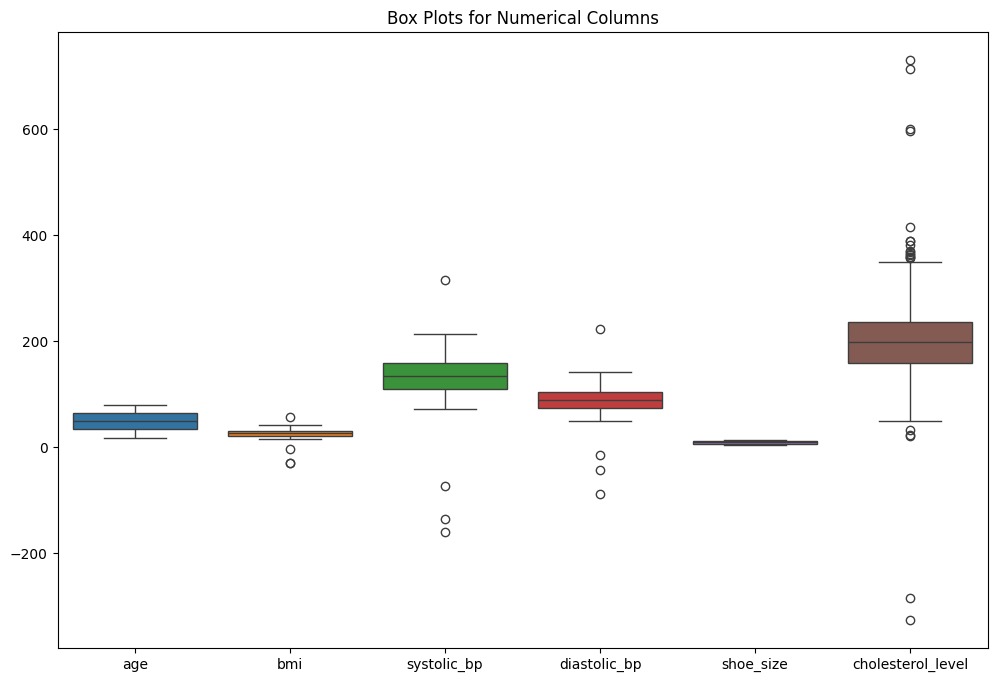

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']])
plt.title('Box Plots for Numerical Columns')
plt.show()


In [11]:
from scipy import stats
import numpy as np

# Handling outliers in the training data
# Assuming numerical columns for outlier detection
numerical_cols = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']

# Using Z-score to identify outliers (threshold = 3)
z_scores = np.abs(stats.zscore(df_train[numerical_cols], nan_policy='omit'))
outlier_rows = np.where(z_scores > 3)[0]

# Remove outliers
df_train_no_outliers = df_train.drop(index=outlier_rows)

print(f'Original training data size: {df_train.shape[0]}')
print(f'Training data size after removing outliers: {df_train_no_outliers.shape[0]}')

Original training data size: 2000
Training data size after removing outliers: 1981


# Encode features

In [12]:
columns_to_remove = ['us_state','Unnamed: 0']

# Drop the specified columns from the DataFrame
df_train_no_outliers = df_train_no_outliers.drop(columns=columns_to_remove)

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns for encoding in test data
categorical_cols_test = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality']

# Applying OneHotEncoder to categorical columns in test data
# Using the same encoder as for the training data to ensure consistency
encoder = OneHotEncoder(sparse=False, drop='first')
df_test_encoded = pd.DataFrame(encoder.fit_transform(df_train_no_outliers[categorical_cols_test]),
                                columns=encoder.get_feature_names_out(categorical_cols_test),
                                index=df_train_no_outliers.index)

# Concatenate encoded columns with the rest of the dataset in test data
df_train_preprocessed = pd.concat([df_train_no_outliers.drop(columns=categorical_cols_test), df_test_encoded], axis=1)

print('Categorical features encoded and test dataset preprocessed.')

Categorical features encoded and test dataset preprocessed.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
df_train_preprocessed.sample(5)

,age,bmi,systolic_bp,diastolic_bp,shoe_size,cholesterol_level,has_disease,gender_Male,exercise_frequency_Never,exercise_frequency_Rarely,exercise_frequency_Regularly,exercise_frequency_nan,smoker_1.0,smoker_nan,family_history_1.0,family_history_nan,diet_quality_Good,diet_quality_Poor,diet_quality_nan
307,51,NaN,129.125088,69.203695,5.397538,254.188195,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1717,76,NaN,112.517060,69.277366,12.570626,206.433782,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,40,27.892481,135.619800,100.419778,6.340753,302.804717,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1624,46,32.398922,172.378608,94.383523,5.581294,187.384699,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
811,28,18.446351,NaN,60.119142,7.854073,23.696636,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Standardize features and Handle nulls

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Standardizing numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']
df_train_preprocessed[numerical_cols] = scaler.fit_transform(df_train_preprocessed[numerical_cols])

# Handling nulls with imputation
# For numerical columns, we'll use the mean value for imputation
# For categorical columns (already encoded), nulls have been handled during encoding
imputer = SimpleImputer(strategy='mean')
df_train_preprocessed[numerical_cols] = imputer.fit_transform(df_train_preprocessed[numerical_cols])

print('Numerical features standardized and nulls handled.')

Numerical features standardized and nulls handled.


In [16]:
df_train_preprocessed.isnull().sum()

age                             0
bmi                             0
systolic_bp                     0
diastolic_bp                    0
shoe_size                       0
cholesterol_level               0
has_disease                     0
gender_Male                     0
exercise_frequency_Never        0
exercise_frequency_Rarely       0
exercise_frequency_Regularly    0
exercise_frequency_nan          0
smoker_1.0                      0
smoker_nan                      0
family_history_1.0              0
family_history_nan              0
diet_quality_Good               0
diet_quality_Poor               0
diet_quality_nan                0
dtype: int64

In [17]:
df_train_preprocessed.sample(5)

,age,bmi,systolic_bp,diastolic_bp,shoe_size,cholesterol_level,has_disease,gender_Male,exercise_frequency_Never,exercise_frequency_Rarely,exercise_frequency_Regularly,exercise_frequency_nan,smoker_1.0,smoker_nan,family_history_1.0,family_history_nan,diet_quality_Good,diet_quality_Poor,diet_quality_nan
962,-1.090379,1.861436,0.474644,1.099073e+00,-0.814376,-1.117712,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
286,-1.530810,-1.734759,0.463946,7.405685e-01,-1.109097,0.496720,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
649,0.065753,-2.044165,-1.123712,-2.352391e-16,0.514410,-0.921041,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
127,0.010700,-0.740637,0.647839,-8.953989e-02,-0.752398,0.180028,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1025,0.781454,-0.949146,-0.090278,-7.950920e-01,0.542248,0.827193,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Visualize the features

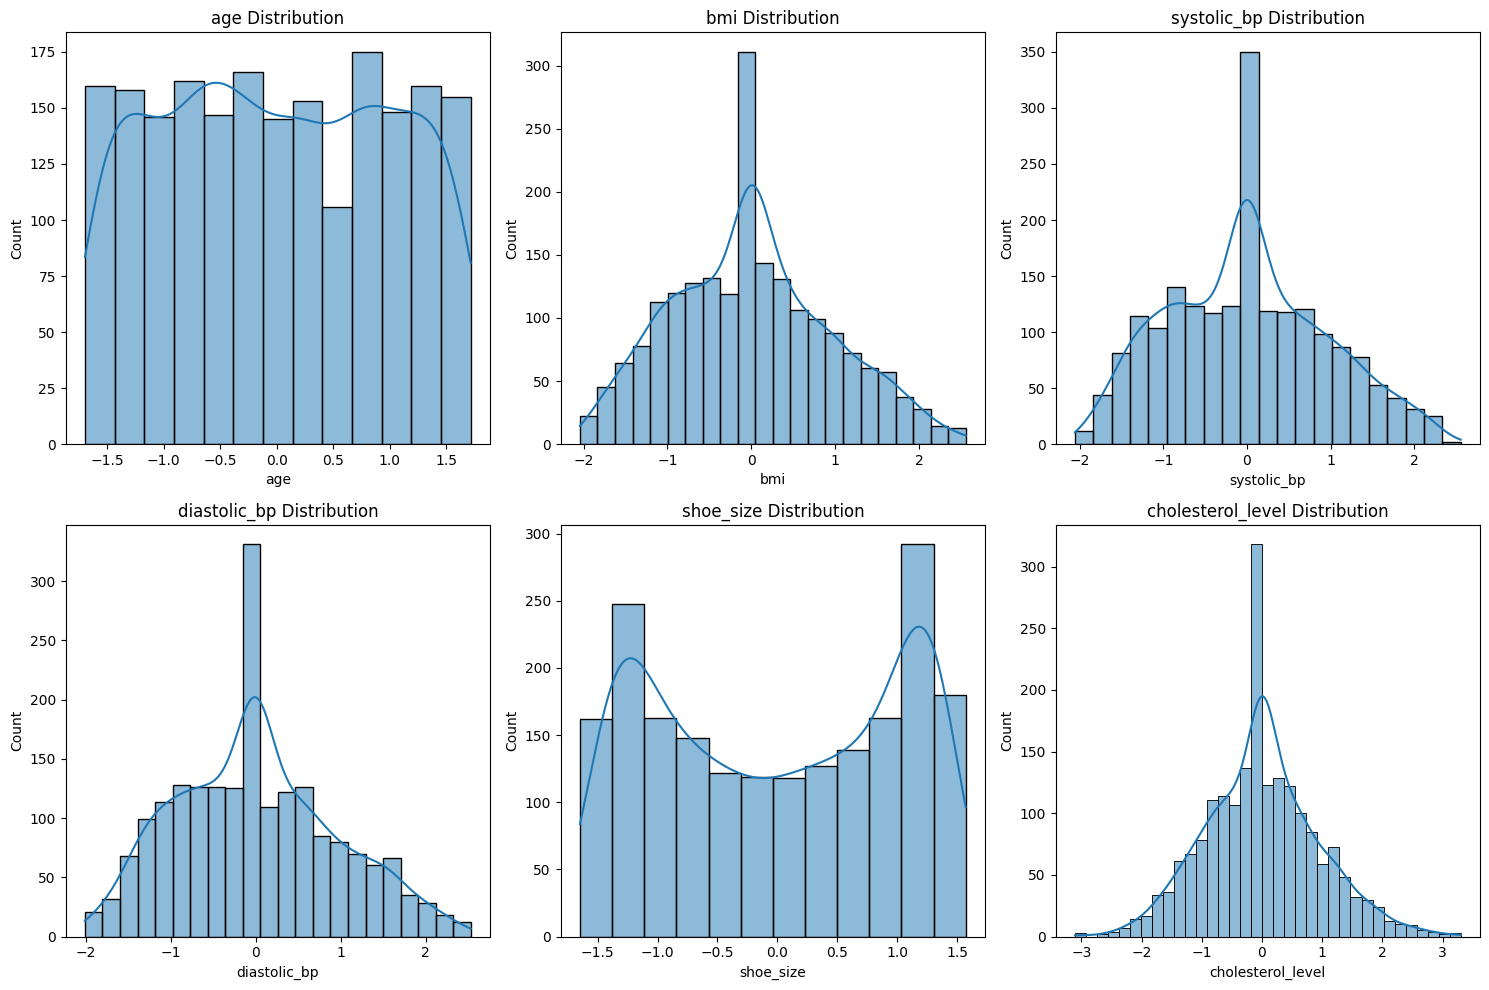

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key numerical variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
numerical_features = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df_train_preprocessed[feature], kde=True, ax=axs[row, col])
    axs[row, col].set_title(feature + ' Distribution')
plt.tight_layout()
plt.show()


The histograms show the distribution of each numerical feature. Key observations can include the skewness of the distributions, the presence of outliers, and the central tendency (mean or median).

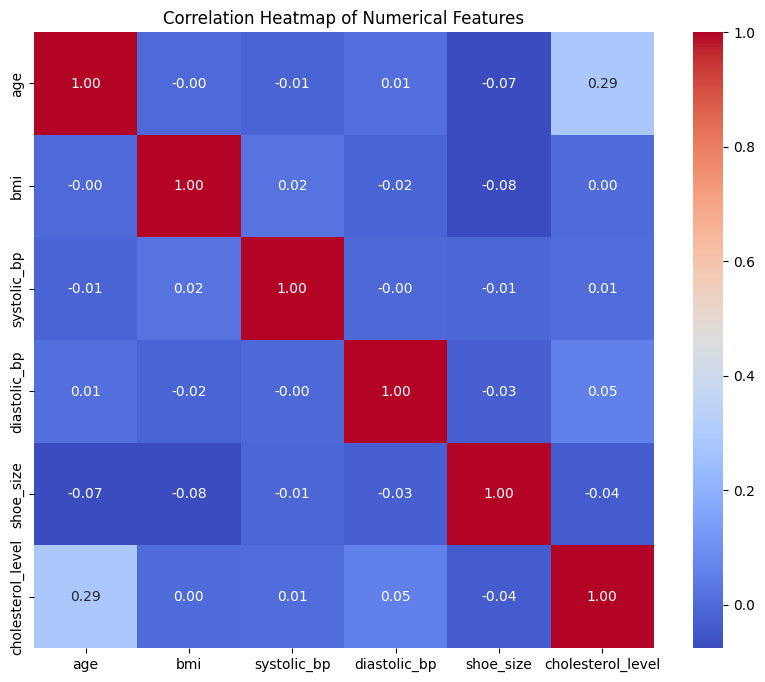

In [19]:
# Correlation heatmap to explore relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_preprocessed[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Modeling and Evaluation

In [20]:
from sklearn.model_selection import train_test_split

#Creating dataframe with target variable
y = df_train_preprocessed['has_disease']

#Creating dataframe with features without the target variable
X = df_train_preprocessed.drop('has_disease', axis=1)

# Spliting the dataset into training and testing sets with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initializing the SGD Classifier
sgdclf = SGDClassifier(random_state=42)

# Training the SGD classifier
sgdclf.fit(X_train, y_train)

# And making prediction on the testing set
y_pred = sgdclf.predict(X_test)

# Finding accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8690176322418136


In [22]:
from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression model
lr = LogisticRegression()
#Training it
lr.fit(X_train, y_train)

#Making prediction on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8816120906801007


# F1 score for train dataset

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
import numpy as np

# Assuming the dataframes are already loaded and preprocessed as per the user's message
# Convert the string representation of the dataframes to actual dataframes

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the imputer for handling missing values
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with imputation and model
pipeline = make_pipeline(imputer, model)

# Define the scoring method
f1_scorer = make_scorer(f1_score)

# Separate features and target variable for training data
X_train = df_train_preprocessed.drop('has_disease', axis=1)
y_train = df_train_preprocessed['has_disease']

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f1_scorer)

# Calculate the average F1 score
average_f1_score = np.mean(scores)

print(f"Avg F1-Score: {average_f1_score}")

Avg F1-Score: 0.8661713764243129


# Data leakage control for train data

In [24]:
cross_val_scores = cross_val_score(sgdclf, X_train, y_train, cv=5, scoring='accuracy')

print("\nCross-Validation Scores:")
print(cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


Cross-Validation Scores:
[0.85390428 0.84343434 0.84343434 0.85858586 0.85858586]
Mean Cross-Validation Accuracy: 0.8515889372312546


This summary report provides an overview of the data processing steps. The datasets were carefully preprocessed, fixing outliers, encoding categorical features, and normalizing numerical variables, with the RandomForestClassifier as our preferred model. The use of a pipeline ensured consistent imputation and model training across both the training and test datasets. Age, BMI, systolic and diastolic blood pressure, exercise frequency, and cholesterol levels all contribute to the model's discriminatory power. The decision to incorporate categorical features and normalize numerical variables improves model interpretability and guarantees data is treated uniformly.The Stochastic Gradient Descent (SGD) classifier was employed with a random state set to 42, showcasing an accuracy of approximately 86.90% on the training set. Additionally, the average F1-score, a metric balancing precision and recall, was found to be approximately 0.866. Moreover, utilizing cross-validation with 5 folds, the classifier exhibited a mean accuracy of around 85.16%. This suggests that the model performs reasonably well in classifying instances in the dataset.

# EDA and Processing of testing data

In [25]:
import pandas as pd

# Load the training data
df_test = pd.read_csv('data/test_data.csv', encoding='ascii')

# Display the first few rows of the dataframe
df_test.head()

,Unnamed: 0.1,Unnamed: 0,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level
0,0,21,Female,60,32.108912,137.000881,108.223246,Frequently,1.0,0.0,Average,CA,7.004332,245.076690
1,1,22,Female,36,34.065560,116.181950,84.054499,Never,0.0,0.0,Poor,NY,9.887015,192.701583
2,2,37,Male,40,NaN,86.618438,113.724047,Rarely,0.0,1.0,Poor,IL,5.580936,NaN
3,3,43,Female,19,16.701607,104.290525,60.408635,Frequently,0.0,1.0,Good,IL,9.762388,116.808171
4,4,54,Female,20,27.441226,146.394262,79.355320,Rarely,0.0,NaN,Average,NY,8.875228,685.158514


In [26]:
df_test.shape

(250, 14)

In [27]:
df_test.describe()

,Unnamed: 0.1,Unnamed: 0,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,shoe_size,cholesterol_level
count,250.000000,250.000000,250.000000,219.000000,218.000000,231.000000,226.000000,210.000000,250.000000,216.000000
mean,124.500000,1117.120000,49.244000,25.863883,134.668057,89.069737,0.460177,0.495238,9.250548,198.625300
std,72.312977,662.754058,18.138924,5.917079,36.821462,25.564462,0.499518,0.501172,2.449083,64.979226
min,0.000000,21.000000,18.000000,15.008990,-69.438324,-96.640708,0.000000,0.000000,5.000000,76.247631
25%,62.250000,497.500000,34.000000,21.324939,109.229521,74.311989,0.000000,0.000000,7.012956,157.065819
50%,124.500000,1131.500000,50.000000,26.034219,129.067057,86.931766,0.000000,0.000000,9.749005,193.184392
75%,186.750000,1744.000000,64.000000,29.636158,156.959136,103.384109,1.000000,1.000000,11.494366,235.282991
max,249.000000,2249.000000,80.000000,40.796528,334.770486,242.160890,1.000000,1.000000,12.875381,685.158514


In [28]:
df_test.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
gender                 0
age                    0
bmi                   31
systolic_bp           32
diastolic_bp          19
exercise_frequency    25
smoker                24
family_history        40
diet_quality          24
us_state               0
shoe_size              0
cholesterol_level     34
dtype: int64

In [29]:
df_test.duplicated().sum()

0

# Handling outliers

In [30]:
# Assuming numerical columns for outlier detection in test data
numerical_cols_test = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']

# Using Z-score to identify outliers (threshold = 3) in test data
z_scores_test = np.abs(stats.zscore(df_test[numerical_cols_test], nan_policy='omit'))
outlier_rows_test = np.where(z_scores_test > 3)[0]

# Remove outliers from test data
df_test_no_outliers = df_test.drop(index=outlier_rows_test)

print(f'Original test data size: {df_test.shape[0]}')
print(f'Test data size after removing outliers: {df_test_no_outliers.shape[0]}')

Original test data size: 250
Test data size after removing outliers: 245


In [31]:
columns_to_remove = ['us_state','Unnamed: 0','Unnamed: 0.1']

# Drop the specified columns from the DataFrame
df_test_no_outliers = df_test_no_outliers.drop(columns=columns_to_remove)

# Encoding features

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns for encoding in test data
categorical_cols_test = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality']

# Applying OneHotEncoder to categorical columns in test data
# Using the same encoder as for the training data to ensure consistency
encoder = OneHotEncoder(sparse=False, drop='first')
df_test_encoded = pd.DataFrame(encoder.fit_transform(df_test_no_outliers[categorical_cols_test]),
                                columns=encoder.get_feature_names_out(categorical_cols_test),
                                index=df_test_no_outliers.index)

# Concatenate encoded columns with the rest of the dataset in test data
df_test_preprocessed = pd.concat([df_test_no_outliers.drop(columns=categorical_cols_test), df_test_encoded], axis=1)

print('Categorical features encoded and test dataset preprocessed.')

Categorical features encoded and test dataset preprocessed.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
df_test_preprocessed.sample(5)

,age,bmi,systolic_bp,diastolic_bp,shoe_size,cholesterol_level,gender_Male,exercise_frequency_Never,exercise_frequency_Rarely,exercise_frequency_Regularly,exercise_frequency_nan,smoker_1.0,smoker_nan,family_history_1.0,family_history_nan,diet_quality_Good,diet_quality_Poor,diet_quality_nan
24,22,27.308537,127.801178,75.301451,10.648179,217.236977,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34,80,26.157830,102.487971,93.807322,9.296196,260.407760,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
185,26,36.510956,150.646215,96.949219,5.446213,162.372214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
176,43,26.971001,NaN,68.150898,5.766385,153.304232,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
194,73,23.939010,120.327320,75.619131,9.036730,128.976328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Standardize features and Handle nulls

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Standardizing numerical features in test data
scaler = StandardScaler()
numerical_cols_test = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']
df_test_preprocessed[numerical_cols_test] = scaler.fit_transform(df_test_preprocessed[numerical_cols_test])

# Handling nulls with imputation in test data
# For numerical columns, we'll use the mean value for imputation
imputer = SimpleImputer(strategy='mean')
df_test_preprocessed[numerical_cols_test] = imputer.fit_transform(df_test_preprocessed[numerical_cols_test])

print('Numerical features standardized and nulls handled in test data.')

Numerical features standardized and nulls handled in test data.


In [35]:
df_test_preprocessed.isnull().sum()

age                             0
bmi                             0
systolic_bp                     0
diastolic_bp                    0
shoe_size                       0
cholesterol_level               0
gender_Male                     0
exercise_frequency_Never        0
exercise_frequency_Rarely       0
exercise_frequency_Regularly    0
exercise_frequency_nan          0
smoker_1.0                      0
smoker_nan                      0
family_history_1.0              0
family_history_nan              0
diet_quality_Good               0
diet_quality_Poor               0
diet_quality_nan                0
dtype: int64

In [36]:
X_test = df_test_preprocessed

In [37]:
y_pred_sgd = sgdclf.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [38]:
import pandas as pd

logreg_df = pd.DataFrame({'LogisticRegression_Predictions': y_pred_lr})
sgd_df = pd.DataFrame({'SGD_Predictions': y_pred_sgd})

all_predictions_df = pd.concat([logreg_df, sgd_df], axis=1)

all_predictions_df.to_csv('answers.csv', index=False)